In [1]:
import cv2
import os
import numpy as np
import time
from IPython.core.display import display
from PIL import Image

print(f'Using OpenCV v{cv2.__version__}')

Using OpenCV v4.1.1


In [6]:
BASE_DIR =  '.'
video_path = os.path.join(BASE_DIR, 'xavi_detection01.mp4')
test_image = os.path.join(BASE_DIR, 'test_image.png')
test_image2 =  os.path.join(BASE_DIR, 'download.png')

In [3]:
# Generate a random color palette
COLORS = np.random.uniform(0, 255, size=(15, 3))

In [4]:
def detect_people(net, image, conf_thr):
  """
  Detect people on an image and return bounding boxes.

  Arguments:
    net: OpenCV loaded net
    image (array): input image
    conf_thr (float): confidence threshold
  """

  person_class = 1

  # Make prediction on image
  net.setInput(cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True, crop=False))   # size could be changed if used another ssd-mobilenet-v2
  cvOut = net.forward()

  # Iterate over each detection and save boundig box 
  # if confidence is above threshold and detected class is person
  person_boxes = []

  for detection in cvOut[0,0,:,:]:
      score = float(detection[2])
      if score > conf_thr and detection[1] == person_class:
          left = int(detection[3] * cols)
          top = int(detection[4] * rows)
          right = int(detection[5] * cols)
          bottom = int(detection[6] * rows)
          person_boxes.append([left, top, right, bottom])

  return sorted(person_boxes)

def plot_boxes(image, boxes):
  """
  Plot bounding boxes on an image.

  Arguments:
    image (array): input image
    boxes (array): array of bounding boxes with [left, top, right, bottom] positions
  """
  for i in range(len(boxes)):
    bbox = boxes[i]

    left = bbox[0]
    top = bbox[1]
    right = bbox[2]
    bottom = bbox[3]

    # Plot bounding box
    cv2.rectangle(image, (left, top), (right, bottom), COLORS[i], thickness=2)
    cv2.putText(image, f'{i+1}', (int(left)+5, int(top)+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2)

  #cv2.imshow("img", img)
  # Convert to RGB and display image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  display(Image.fromarray(image))

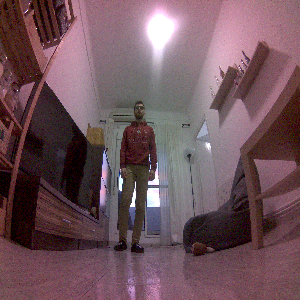

CPU times: user 2.59 s, sys: 696 ms, total: 3.28 s
Wall time: 4.33 s


In [7]:
%%time
# https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

# Try people detector on test image

CONF_THR = 0.4

# Load ssd-mobilenet (OpenCV uses pb binary and pbtxt protobuf)
ssd_mobilenet_pb = os.path.join('ssdlite-mobilenet-v2', 'frozen_inference_graph.pb') 
ssd_mobilenet_pbtxt =  os.path.join('ssdlite-mobilenet-v2', 'ssdlite_mobilenet_v2_coco.pbtxt')
ssd_net = cv2.dnn.readNetFromTensorflow(ssd_mobilenet_pb, ssd_mobilenet_pbtxt)

# Load image
img = cv2.imread(test_image2)
rows = img.shape[0]
cols = img.shape[1]

people_detections = detect_people(ssd_net, img, CONF_THR)

plot_boxes(img, people_detections)